In [1]:
pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=a12bbaa18e2a81900a6daf013c263771108c4f327c2da159d42e7e87e0132b4b
  Stored in directory: /root/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import gdown
import numpy as np  

url = 'https://drive.google.com/uc?id=1JBB9ccpQe8QNmaQPyik9UJN1vy1akQTP'

gdown.download(url, fuzzy=False)

!7z x /kaggle/working/MADE_2022.7z

Downloading...
From: https://drive.google.com/uc?id=1JBB9ccpQe8QNmaQPyik9UJN1vy1akQTP
To: /kaggle/working/MADE_2022.7z
100%|██████████| 2.39G/2.39G [00:21<00:00, 109MB/s] 



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/workin                        1 file, 2387778507 bytes (2278 MiB)

Extracting archive: /kaggle/working/MADE_2022.7z
--
Path = /kaggle/working/MADE_2022.7z
Type = 7z
Physical Size = 2387778507
Headers Size = 487
Method = LZMA2:24
Solid = +
Blocks = 9

      0% - part_1.js                  1% - part_1.js                  2% - part_1.js                  3% - part_1.js                  4% - part_1.js                  5% - part_1.js                  5% 1 - part_10.jso                      6% 1 - part_10.jso                      7% 1 - part_10.jso                      8% 1 - part_10.jso                      9% 1 - part_10.jso                     10% 1 - part_10.jso                     11% 1 - part_10.jso                     11%     11% 2 - part_11.jso

In [31]:
def add_author(authors):
    for i  in authors:
        if i.has_key('_id'):
            all_authors[i['_id']]+=1;


def prepare_author(x):
    if type(x) != list:
        return []
    else:
        return x
    
import numpy as np
import pandas as pd


def iterate_over_batches(func_list):
        for i in range(1, 18):
            with open(str("./part_" + str(i) + ".json"), 'r') as outfile:
                print(f"processing {i}th file")
                q = pd.read_json(outfile)
                print(f"{i}th file read succesfully")
               # print(q)
                del q['url']
                del q['page_start']
                del q['page_end']
                del q['pdf']
                del q['issue']
                del q['issn']
                del q['isbn']
                del q['doi']
                del q['lang']
                del q['volume']
                q.dropna(subset = ['references', 'title',
                      'abstract', 'fos', 'keywords'], inplace = True)
              #  print(q)
                #drop_Nan(q)
                for func in func_list:
                    func(q)
                print(f"{i}th file procedeed succesfully")
                del q 
                
                
def iterate_over_batches_wout_dropna(func):
        for i in range(1, 18):
            with open(str("./part_" + str(i) + ".json"), 'r') as outfile:
                print(f"processing {i}th file")
                q = pd.read_json(outfile)
                print(f"{i}th file read succesfully")
               # print(q)
                del q['url']
                del q['page_start']
                del q['page_end']
                del q['pdf']
                del q['issue']
                del q['issn']
                del q['isbn']
                del q['doi']
                del q['lang']
                del q['volume']
                #drop_Nan(q)
                #for func in func_list:
                func(q)
                print(f"{i}th file procedeed succesfully")
                del q


In [24]:
'''Statistics calculations block'''
def uniq_auth(q):
    q['authors'] = q['authors'].apply(prepare_author)
    for i in q['authors']:
        for j in i:
            if '_id'  in j.keys():
                if j['_id'] in auth_publication_id.keys():
                    auth_publication_id[j['_id']] += 1
                    if 'name' in j.keys():
                        dct_author_id_name[j['_id']] = j['name']
                else:
                    auth_publication_id[j['_id']] = 1
                    if 'name' in j.keys():
                        dct_author_id_name[j['_id']] = j['name']

def top_auth_on_pub(q):
    q['authors'] = q['authors'].apply(prepare_author)
    for i in q['authors']:
        for j in i:
            if 'name' in j.keys():
                if j['name'] in auth_publication_name.keys():
                    auth_publication_name[j['name']] += 1
                else:
                    auth_publication_name[j['name']] = 1

                    
def number_coath(q):
    lst_tmp = [-1 for i in range(len(q))]
    q['authors'] = q['authors'].apply(prepare_author)
    for i, auth in enumerate(q['authors']):
        for j in auth:
            if '_id' in j.keys():
                lst_tmp[i] += 1
            else:
                continue
    
    for auth in q['authors']:
        for j in auth:
            if '_id' in j.keys():
                if j['_id'] in dct_numb_coatch.keys():
                    dct_numb_coatch[j['_id']] += lst_tmp[i]
                else:
                    dct_numb_coatch[j['_id']] = lst_tmp[i]
    del lst_tmp[:]      

    
def num_citation(q):

    lst_citation = list(q['n_citation'])

    for i, auth in enumerate(q['authors']):
        for j in auth:
            if '_id' in j.keys():
                if j['_id'] in dct_citation.keys():
                    dct_citation[j['_id']] += lst_citation[i]
                else:
                    dct_citation[j['_id']] = lst_citation[i]


    del lst_citation[:]
    
    
def share_of_null(df):
    for i in range(len(main_columns)):
        len_main_columns[i].append(df[main_columns[i]].isna().sum())
    len_each_batch.append(len(df))

def years_stat(df):
    for year in df['year']:
        if year in year_publication.keys():
            year_publication[year] += 1
        else:
            year_publication[year] = 1  
            
def prepare_fos(x):
    if type(x) != list:
        return []
    else:
        for i in range(len(x)):
            if type(x[i]) == dict:
                x[i] = x['name']
        return x
            
def count_fos(q):
    q['fos'] = q['fos'].apply(prepare_fos)
    for i in q['fos']:
        for j in i:
            if type(j) == dict:
                s  = j['name']
            else:
                s = j
            if j in cnt_fos.keys():
                cnt_fos[j]+=1
            else:
                cnt_fos[j]=1
                
def count_keywords(q):
    q['keywords'] = q['keywords'].apply(prepare_fos)
    for i in q['keywords']:
        for j in i:
            s = j
            if j in cnt_keywords.keys():
                cnt_keywords[j] += 1
            else:
                cnt_keywords[j] = 1
                
def venue_trans(q):
    for el in q['venue']:
        if type(el) == dict:
            if 'name' in el.keys():
                if el['name'] in dct_venue_name.keys():
                    dct_venue_name[el['name']] += 1 
                else:
                    dct_venue_name[el['name']] = 1
            elif 'name_d' in el.keys():
                    if el['name_d'] in dct_venue_name.keys():
                        dct_venue_name[el['name_d']] += 1
                    else:
                        dct_venue_name[el['name_d']] = 1
                        
                        
def prepare_venue(x):
    if type(x) != dict:
        return {}
    else:
        return x


def venue_count(q):
    q['venue'] = q['venue'].apply(prepare_venue)
    for el in q['venue']:
        if 'name' in el.keys():
            if el['name'] in dct_venue_count.keys():
                dct_venue_count[el['name']] += 1
            else:
                dct_venue_count[el['name']] = 1
        elif 'name_d' in dct_venue_count.keys():
            if el['name_d'] in dct_venue_count.keys():
                dct_venue_count[el['name_d']] += 1
            else:
                dct_venue_count[el['name_d']] = 1  

In [33]:
auth_publication_id = dict()
auth_publication_name = dict()
year_publication = dict()
dct_numb_coatch = dict()
dct_citation = dict()
dct_venue_name = dict()
dct_author_id_name = dict()
cnt_fos = dict()
cnt_keywords = dict()
dct_venue_count = dict()
main_columns = ['title', 'year', 'keywords', 'fos', 'n_citation', 'abstract', 'references']
len_each_batch = []
len_main_columns = [[] for i in range(len(main_columns))]
iterate_over_batches([uniq_auth,top_auth_on_pub,years_stat,number_coath,num_citation,count_fos,count_keywords,venue_trans, venue_count])
iterate_over_batches_wout_dropna(share_of_null)

processing 1th file
1th file read succesfully
venue_size = 0 in batch1
1th file procedeed succesfully
processing 2th file
2th file read succesfully
2th file procedeed succesfully
processing 3th file
3th file read succesfully
3th file procedeed succesfully
processing 4th file
4th file read succesfully
4th file procedeed succesfully
processing 5th file
5th file read succesfully
5th file procedeed succesfully
processing 6th file
6th file read succesfully
6th file procedeed succesfully
processing 7th file
7th file read succesfully
7th file procedeed succesfully
processing 8th file
8th file read succesfully
8th file procedeed succesfully
processing 9th file
9th file read succesfully
9th file procedeed succesfully
processing 10th file
10th file read succesfully
10th file procedeed succesfully
processing 11th file
11th file read succesfully
11th file procedeed succesfully
processing 12th file
12th file read succesfully
12th file procedeed succesfully
processing 13th file
13th file read succes

## ****Число уникальных авторов - Более двух миллионов!**** 

In [7]:
len(auth_publication_id)

2577794

## **Топ 10 самых публикуемых авторов**

In [8]:
#@title Топ 10 самых публикуемых авторов
from collections import Counter
tmp = dict(Counter(auth_publication_id).most_common(10))
for el in tmp.keys():
    print(dct_author_id_name[el])
auth_publication_name.clear()

H Vincent Poor
Lajos Hanzo
Mohamed-Slim Alouini
Wen Gao
Victor C. M. Leung
Hai Jin
Philip S. Yu
Chin-Chen Chang
Witold Pedrycz
Licheng Jiao


### Наиболее Публикуемый автор в датасете - ***H Vincent Poor***
<div>
<img src="https://environment.princeton.edu/wp-content/uploads/2016/06/Poor_retina.jpg" width="300"/>
</div>

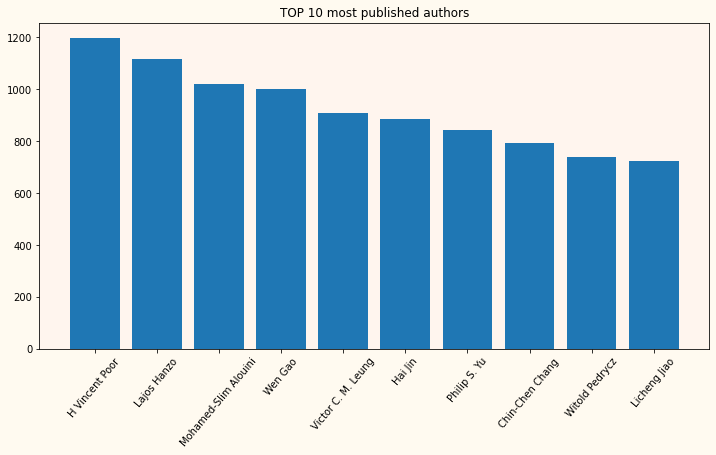

In [9]:
import matplotlib.pyplot as plt

x = list(tmp.keys())
for i in range(len(x)):
    x[i] = dct_author_id_name[x[i]]
y = list(tmp.values())

fig, ax = plt.subplots()

ax.bar(x, y)

#for X, Y in zip(x, y):
    #plt.annotate(text=str(Y), xy=(X, Y))
    
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=50)
plt.title('TOP 10 most published authors')

plt.show()

### График наиболее публикуемых в рамках датасета авторов. Мы видим отсутствие скачков в графике публикуемых ,а также внушительное число статей(от 800 до 1200) у наиболее публикуемых авторов.

## **Диапазон лет статей**

In [10]:
#@title Диапазон лет статей
sorted_year_publication = dict(sorted(year_publication.items(), reverse=True))
years = list(sorted_year_publication.keys())
years_norm = []
num_public = []
for i in range(len(sorted_year_publication)):
    if years[i] <= 2022 and years[i] >= 1800:
        years_norm.append(years[i])
        num_public.append(sorted_year_publication[years[i]])

print(f'Диапазон лет статей от {int(years_norm[len(years_norm) - 1])} до {int(years_norm[0])}')

Диапазон лет статей от 1800 до 2021


### Статьи в исследуемом датасете охватывают целых три века. Новизна статьи очень важная характристика, поэтому время написание статьи будет учитываться в будущих моделях, в связи с чем мы оставили этот параметр в нашем датасете.

## **Число статей по годам в 21 веке**

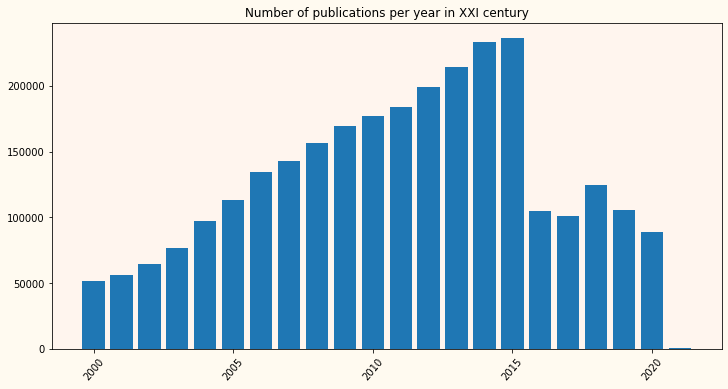

In [11]:
#@title Число статей по годам в 21 веке
import matplotlib.pyplot as plt

x = years_norm[0:22]
y = num_public[0:22]

fig, ax = plt.subplots()

ax.bar(x, y)

    
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=50)
plt.title('Number of publications per year in XXI century')

plt.show()

### Число статей в 21 веке не опускалось ниже 50000 в год, демонстрируя уверенный рост в первые 15 лет.  Затем число публикаций сократилось более чем в 2 раза. Возможно это связано с тем, что более свежие статьи не были внесены в анализируемый датасет.

## **Число статей по годам в 20 веке**

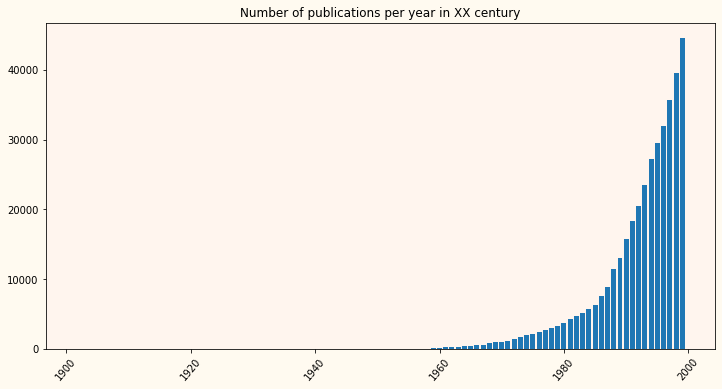

In [12]:
#@title Число статей по годам в 20 веке
import matplotlib.pyplot as plt

years_20_cntr = []
for year in years_norm:
    if year < 2000 and year > 1900:
        years_20_cntr.append(year)

num_public_20_cntr = []
for year in years_20_cntr:
    num_public_20_cntr.append(year_publication[year])

x = years_20_cntr
y = num_public_20_cntr

fig, ax = plt.subplots()

ax.bar(x, y)

    
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=50)
plt.title('Number of publications per year in XX century')

plt.show()

### В 20 веке число публикаций в год заметно меньше. Даже в самые пиковые годы оно не превышает 50 000, что являлось минимум для 21 века. Кроме того, до 1960 публиковалось крайне мало статей, но сразу после этой даты наблюдается практически экспоненциальный рост.

## **Доля статей по периодам**

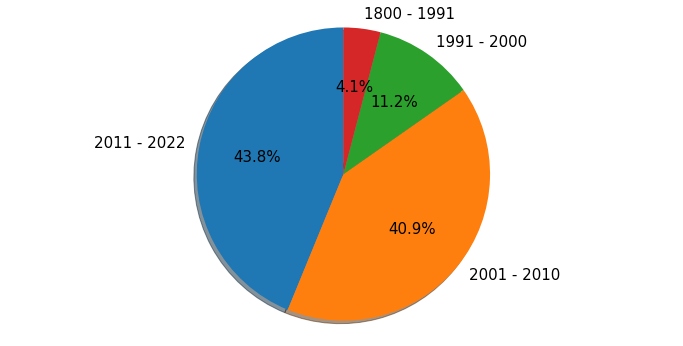

In [13]:
#@title Доля статей по периодам
ln = 4
share = np.zeros(ln)
for i in range(ln - 1):
    share[i] = sum(num_public[i*10:i*10 + 10])/sum(num_public)

share[ln-1] = sum(num_public[30:])/sum(num_public)

labels = '2011 - 2022', '2001 - 2010', '1991 - 2000', '1800 - 1991'

fig1, ax1 = plt.subplots()
fig1.set_figwidth(12)    #  ширина Figure
fig1.set_figheight(6)  
ax1.pie(share, labels=labels, autopct='%1.1f%%',startangle=90, shadow = True, textprops={'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Из графика хорошо видно, что подавляющее большинство статей (почти 85%) дествительно было написано в 21 веке. Причем самым доминирующим в этом смысле является именно последнее десятилетие.

## **Топ 10 авторов по соавторам**

In [14]:
#@title Топ 10 авторов по соавторам
from collections import Counter
tmp = dict(Counter(dct_numb_coatch).most_common(10))
for el in tmp.keys():
    print(dct_author_id_name [el])

H Vincent Poor
Lajos Hanzo
Mohamed-Slim Alouini
Wen Gao
Victor C. M. Leung
Hai Jin
Philip S. Yu
Chin-Chen Chang
Thomas Huang
K. J. Ray Liu


### Выше представлен топ авторов с наибольшим числом соавторов. Несложно заметить, что многие фамилии мы уже встречале ранее - в топе самых публикуемых авторов. Посмотрим также на график:

## **Топ 20 авторов по соавторам**

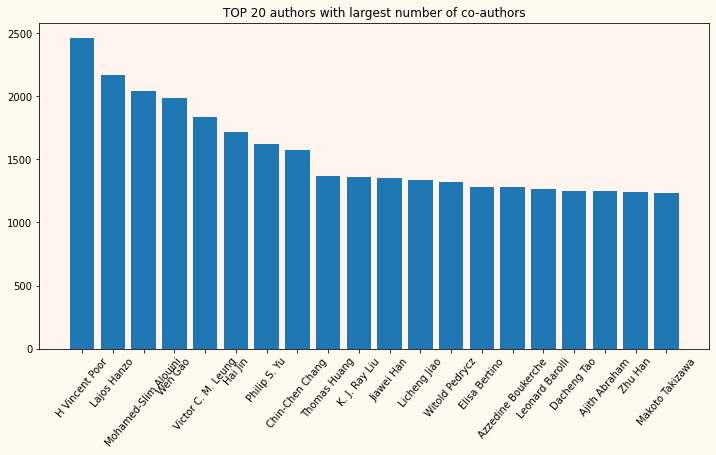

In [15]:
#@title Топ 20 авторов по соавторам
import matplotlib.pyplot as plt

tmp = dict(Counter(dct_numb_coatch).most_common(20))
dct_numb_coatch.clear()

x = list(tmp.keys())
for i in range(len(x)):
    x[i] = dct_author_id_name[x[i]]
y = list(tmp.values())

fig, ax = plt.subplots()

ax.bar(x, y)

#for X, Y in zip(x, y):
    #plt.annotate(text=str(Y), xy=(X, Y))
    
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=50)
plt.title('TOP 20 authors with largest number of co-authors')

plt.show()

### Здесь также отсутствуют сильные скачки. Кроме того, лидирует уже знакомый нам ***H Vincent Poor***. Впечатляет также число соавторов всех ученых топа (от 1300 до 2500).

## **Топ 20 авторов по цитированию**

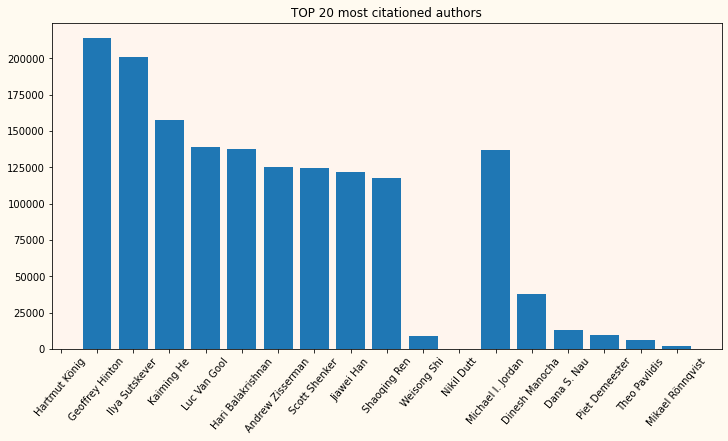

In [16]:
#@title Топ 20 авторов по цитированию
import matplotlib.pyplot as plt
from collections import Counter

tmp = dict(Counter(dct_citation).most_common(20))
#dct_citation.clear()

x = list(tmp.keys())

for i in range(len(x)):
    x[i] = dct_author_id_name[x[i]]
y = list(tmp.values())

fig, ax = plt.subplots()

ax.bar(x, y)

#for X, Y in zip(x, y):
    #plt.annotate(text=str(Y), xy=(X, Y))
    
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=50)
plt.title('TOP 20 most citationed authors')

plt.show()

### Из графика видно, что у лидера топа число цитировании более ***200 000***! Крайне внушительная и неожиданная цифра. Поражает также диапазон цитирований среди авторов первой двадцатки. От 2-3 тысяч до почти четверти миллиона.

## **Полнота основных полей в данных**

In [17]:
#@title Полнота основных полей в данных
for i in range(len(main_columns)):
    tmp = (sum(len_each_batch) - sum(len_main_columns[i]))/sum(len_each_batch)
    print(f'Полнота значений для {main_columns[i]} составляет {tmp:.5f}')

Полнота значений для title составляет 1.00000
Полнота значений для year составляет 1.00000
Полнота значений для keywords составляет 1.00000
Полнота значений для fos составляет 1.00000
Полнота значений для n_citation составляет 0.96855
Полнота значений для abstract составляет 1.00000
Полнота значений для references составляет 1.00000


### Полнота основных полей, которые мы выделили, на исходных данных. Больше всего пропусков наблюдается в references. При этом по остальным фичам полнота почти не опускается ниже 80%. 

## Топ 10 журналов или конференций по публикациям

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

tmp = dict(Counter(dct_venue_count).most_common(10))
tmp_new = {}
tmp_new['ACM International Conference\nProceeding Series'] = tmp['ACM International Conference Proceeding Series']
tmp_new['ACM SIGPLAN\nNotices'] = tmp['ACM SIGPLAN\r\nNotices']
tmp_new['Winter Simulation Conference'] = tmp['Winter Simulation Conference']
tmp_new['Symposium on Discrete Algorithms'] = tmp['Symposium on Discrete Algorithms']
tmp_new['Symposium on Applied Computing'] = tmp['Symposium on Applied Computing']
tmp_new['Conference on Information\nand Knowledge Management'] = tmp['Conference on Information and Knowledge Management']
tmp_new['Science China\nInformation Sciences'] = tmp['Science China Information Sciences']
tmp_new['Embedded Network Sensor Systems'] = tmp['Embedded Network Sensor Systems']
tmp_new['Proceedings of the 25th\nACM SIGKDD International Conference\non Knowledge Discovery & Data Mining'] = tmp['Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining']
tmp_new['Computer Science Education'] = tmp['Computer Science Education']
#dct_citation.clear()

x = list(tmp_new.keys())
y = list(tmp_new.values())

fig, ax = plt.subplots()

ax.bar(x, y)

#for X, Y in zip(x, y):
    #plt.annotate(text=str(Y), xy=(X, Y))
    
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=80)
plt.title('TOP 20 most citationed authors')
#plt.rcParams['font.sans-serif']=['SimHei']

plt.show()

### Видно, что все конференции посвящены в основном компьютерным технологиям. Явным лидером здесь является ACM International Conference Proceeding Series (ICPS), на базе которого всего было опубликовано более 45 000 научных статей

## Облако слов наиболее распространенных областей исследования

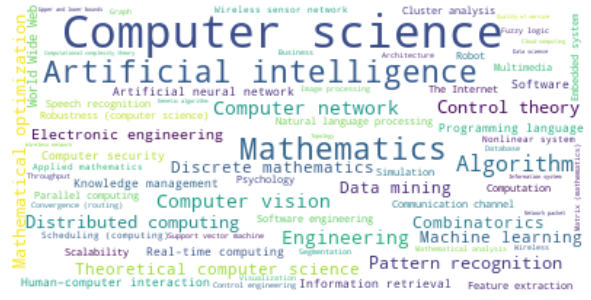

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

fig = figure(figsize=(15, 15), dpi=50)
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(cnt_fos)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
fig.savefig('fos_wordcloud.png')

### Судя по облаку слов, мы иммем дело со статьями из IT-сферы, в основном в тематике computer science, artificial intelligence и смежных науках.

## Облако слов наиболее распресраненых ключевых слов

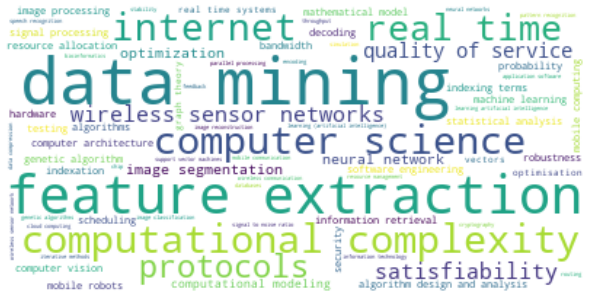

In [19]:
fig = figure(figsize=(15, 15), dpi=50)
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(cnt_keywords)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
fig.savefig('keyword_wordcloud.png')

### Исходя из данного облака, можем сделать вывод, что ключевые слов полностью соответствует темам исследований.

## Облако слов наиболее распространенных журналов/конференций

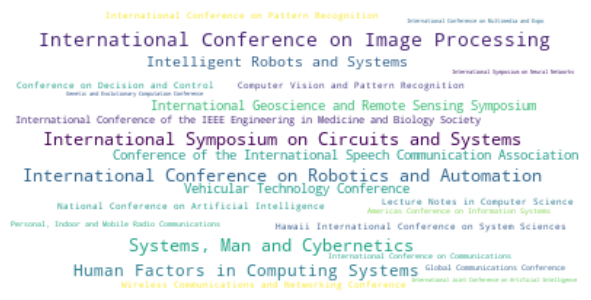

In [34]:
fig = figure(figsize=(15, 15), dpi=50)
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(dct_venue_name)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
fig.savefig('fos_wordcloud.png')

### Полученные облаки слов помогут нам в будущем для topic modelling.